# SmithWorks Studios - Project

* The goal of this project is analyze the data of previous movies to produce the world's best movies.
* The source of information for this project is IMDB, a popular source for movie rating.
* This dataset contains the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online

### Importing Libraries required for Data Analysis

In [37]:
# Pandas Library and Numpy are required for this data analysis project

import pandas as pd
import numpy as np

In [38]:
# Setting max rows to 10 for better data visibility

pd.set_option('max_rows', 10)

### TASK-1 Creating a pandas dataframe for data analysis

In [39]:
# Creating a dataframe named imdb_dataset for analysis. The data set is present on the local disk. 
# Loading it into the dataframe

imdb_dataset = pd.read_csv(r'/Users/dheerajkunchala/Documents/DataScience/Assignment Data/Movie Assignment Data.csv')


In [40]:
# Viewing data set to observe if the data set is loaded correctly

imdb_dataset

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Whiplash,2014,3300000,13092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA
96,Before Midnight,2013,3000000,8114507,Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.0,48.0,...,7.8,7.6,7.3,7.4,7.2,7.0,8.0,7.9,R,USA
97,Star Wars: Episode VII - The Force Awakens,2015,245000000,936662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA
98,Harry Potter and the Deathly Hallows: Part I,2010,150000000,296347721,Rupert Grint,Toby Jones,Alfred Enoch,10000,2000.0,1000.0,...,7.3,8.1,7.4,7.3,8.0,6.7,7.9,7.5,PG-13,UK


## TASK-2 Generate Descriptive Statistics for the budget of all the movies

In [41]:
# Describe() is used to generate descriptive statistics in a dataframe
# Since the descriptive values are not readable due to long values in dollar. We need to convert them to dollars in millions
# Except *** count ***, all other values are in *** millions of dollars ***. 
# Count indicates number of movies counted in the dataframe. We are achieving this using lambda function 
# by dividing value by 1000000 and rounding of to two decimal places except count

imdb_dataset['budget'].describe().map(lambda x : x/1000000 if x > 100 else x).round(2)

count    100.00
mean      78.38
std       74.45
min        3.00
25%       15.75
50%       42.25
75%      150.00
max      260.00
Name: budget, dtype: float64

## TASK-3 Finding out number of top-rated movies produced in the United States that have a PG-13 Rating

In [42]:
# Filtering the Dataframe inline based on content_rating and Country 
# and using len to evaluate the size of the resulting dataframe

count_of_movies = len(imdb_dataset[(imdb_dataset['content_rating'] == 'PG-13') & (imdb_dataset['Country'] == 'USA')])

print(f'The number of top rated movies produced in the United States that have a PG-13 Rating is {count_of_movies}')

The number of top rated movies produced in the United States that have a PG-13 Rating is 35


## TASK-4 Finding out how many top-rated movies produced in 2014 were not produced in the United States

In [43]:
# Filtering the Dataframe inline based on title_year and Country
# and using len to evaluate the size of the resulting dataframe

count_of_movies = len(imdb_dataset[(imdb_dataset['title_year'] == 2014) & (imdb_dataset['Country'] != 'USA')])

print(f'The number of top rated movies produced in the year 2014 but not in the USA is {count_of_movies}')

The number of top rated movies produced in the year 2014 but not in the USA is 4


## TASK-5 Finding out the percentage of the top-rated movies that are in 1 Genre only, 2 Genres only, 3 Genres only

In [44]:
# Identifying the count of movies which have 1 Genre only 
# and dividing by total count will give the percentage of movies in 1 Genre only. 
# This means that Genre_2 and Genre_3 must have NaN

total_movies = len(imdb_dataset)
genre_counts = imdb_dataset[['genre_1','genre_2','genre_3']].isnull().sum()

# if Genre_2 is null indicates Genre_3 is null too. This means the movie is in 1 Genre only
print(f" Percentage of movies with only 1 Genre is: {(genre_counts['genre_2']) * 100 / total_movies}%") 

# if genre_3 is null means the movie has possible genre_2. 
# removing genre_2 nulls from this gives movies with only genre_2 
print(f" Percentage of movies with only 2 Genre's is: {(genre_counts['genre_3'] - genre_counts['genre_2']) * 100 / total_movies}%") 

# removing genre_3 nulls from total movies gives movies with all three genres
print(f" Percentage of movies with all Genre's is: {(total_movies - genre_counts['genre_3']) * 100 / total_movies}%")               

 Percentage of movies with only 1 Genre is: 3.0%
 Percentage of movies with only 2 Genre's is: 23.0%
 Percentage of movies with all Genre's is: 74.0%


## TASK-6 Convert the budget and gross values from “dollars” to “dollars in millions” for all top-rated movies. 
#### Rounding the converted values down to 3 decimal places. 

In [45]:
# Using apply to convert each dollar to dollars in millions by dividing by 1e6. 

imdb_dataset['Gross'] = imdb_dataset['Gross'].apply(lambda x : x/1000000).round(3)
imdb_dataset['budget'] = imdb_dataset['budget'].apply(lambda x : x/1000000).round(3)

In [46]:
imdb_dataset

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30.0,151.102,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150.0,341.268,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12.0,51.739,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47.0,100.546,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9.0,47.695,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Whiplash,2014,3.3,13.092,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA
96,Before Midnight,2013,3.0,8.115,Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.0,48.0,...,7.8,7.6,7.3,7.4,7.2,7.0,8.0,7.9,R,USA
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA
98,Harry Potter and the Deathly Hallows: Part I,2010,150.0,296.348,Rupert Grint,Toby Jones,Alfred Enoch,10000,2000.0,1000.0,...,7.3,8.1,7.4,7.3,8.0,6.7,7.9,7.5,PG-13,UK


## TASK-7 List all details for the top 10 movies with the highest profit, sorted from highest to lowest.

In [54]:
# Profit = Gross - Budget. Adding a new column profit to the dataframe
imdb_dataset['profit'] = imdb_dataset['Gross'] - imdb_dataset['budget']

# Sorting by profit. Highest to the Lowest. Retrieving only top 10 movies
imdb_dataset.sort_values(by = 'profit', ascending = False).head(10)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662
11,The Avengers,2012,220.0,623.280,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.280
47,Deadpool,2016,58.0,363.024,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024
32,The Hunger Games: Catching Fire,2013,130.0,424.646,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.646
12,Toy Story 3,2010,200.0,414.984,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984
8,The Dark Knight Rises,2012,250.0,448.131,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.131
45,The Lego Movie,2014,60.0,257.756,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756
1,Zootopia,2016,150.0,341.268,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268
41,Despicable Me,2010,69.0,251.502,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.0,975.0,...,7.9,7.6,7.5,7.9,7.0,7.6,7.6,PG,USA,182.502
18,Inside Out,2015,175.0,356.454,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,8.1,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181.454


## TASK-8 Generate a list of all the actors, in alphabetical order by the first name, that have starred in a top-rated movie. If an actor has starred in multiple movies, their name should appear only once on the list. 
Assume that all actors’ names are in the format <first_name> <last_name>.

In [55]:
# Here we are appending all three columns to a single series and using Unique were are removing duplicates. The resulting dataset is a ndarray. 
# We are sorting the array using sort function

list_of_all_actors = np.sort(imdb_dataset['actor_1_name'].append(imdb_dataset['actor_2_name']. \
                                                                 append(imdb_dataset['actor_3_name'])).unique()).tolist()
count_invalid = 0 # There is an invalid value 0 as an actor name. We need to subtract this value from the list.

unique_list_actors = []

for actor in list_of_all_actors:
    if actor != '0':
        unique_list_actors.append(actor)
    else:
        count_invalid += 1
    
print(f'\n\n\n Total Number of Unique Actors in the list is: {len(list_of_all_actors) - count_invalid}')
print(unique_list_actors)




 Total Number of Unique Actors in the list is: 234
['Abraham Benrubi', 'Adam Brown', 'Aidan Quinn', 'Aidan Turner', 'Albert Brooks', 'Albert Finney', 'Aldis Hodge', 'Alexandra Maria Lara', 'Alfred Enoch', 'Alison Brie', 'Allen Leech', 'America Ferrera', 'Amiée Conn', 'Amy Adams', 'Amy Poehler', 'Amy Ryan', 'Amy Warren', 'Andrew Garfield', 'Anna Kendrick', 'Anne Hathaway', 'Ariane Labed', 'Athina Rachel Tsangari', 'Ato Essandoh', 'Audrey Fleurot', 'Basher Savage', 'Ben Foster', 'Benedict Cumberbatch', 'Benedict Wong', 'Bernardo Saracino', 'Beth Grant', 'Bill Murray', 'Billy Crudup', 'Bob Balaban', 'Brad Garrett', 'Brad Pitt', 'Bradley Cooper', 'Brian Johnson', "Brian d'Arcy James", 'Bruce Dern', 'Bruce Green', 'Bruce Greenwood', 'Bruce Willis', 'Bryce Dallas Howard', 'BÃ©rÃ©nice Bejo', 'Casey Affleck', 'Charlie Talbert', 'Charlize Theron', 'Chelan Simmons', 'Chiwetel Ejiofor', 'ChloÃ« Grace Moretz', 'Chris Evans', 'Chris Hemsworth', 'Chris Mulkey', 'Chris Pine', 'Christian Bale', 'Ch

## TASK-9 Find the top 3 actors who appeared in the most top-rated movies.

In [49]:
# Using Append to make a single series of all actors. Not removing duplicates here to count who appeared in most number of movies.

full_list_of_actors = imdb_dataset['actor_1_name'].append(imdb_dataset['actor_2_name'].append(imdb_dataset['actor_3_name']))
full_list_of_actors.value_counts().head(3) # Using Head function to retrieve only top 3 actors


Tom Hardy            5
Leonardo DiCaprio    5
Jennifer Lawrence    4
dtype: int64

## TASK-10 Create a data visualization that shows each country and the number of top-rated movies produced in it. Find the country that produced the most top-rated movies.

In [50]:
# Importing matplotlib to accomplish this task
import matplotlib.pyplot as plt

In [51]:
#Creating a dataframe to aggregate the number of top-rated movies produced by each country
imdb_stats = imdb_dataset['Country'].value_counts().to_frame()

In [52]:
imdb_stats

,Country
USA,81
UK,11
Australia,3
France,3
Spain,1
Canada,1


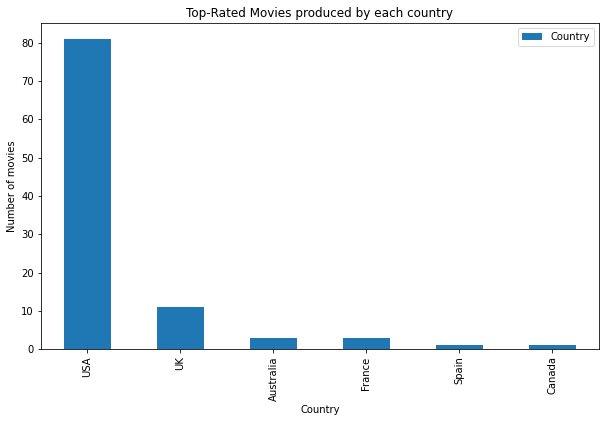

In [53]:
#Plotting the above data frame as a bar plot

imdb_stats.plot(kind = 'bar', y = 'Country', figsize = (10,6))
plt.title('Top-Rated Movies produced by each country')
plt.xlabel('Country')
plt.ylabel('Number of movies')
plt.show()

## USA produced most of the top-rated movies followed by the UK